Starter code for the regression mini-project.
    
Loads up/formats a modified version of the dataset
(why modified?  we've removed some trouble points
that you'll find yourself in the outliers mini-project).

Draws a little scatterplot of the training/testing data

You fill in the regression code where indicated:

In [11]:
import sys
import pickle

import numpy as np
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )
dictionary['METTS MARK']

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

In [12]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, 
                                                                          test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

Import LinearRegression from sklearn, and create/fit your regression. Name it reg so that the plotting code will show it overlaid on the scatterplot. Does it fall approximately where you expected it?

Extract the slope (stored in the reg.coef_ attribute) and the intercept. What are the slope and intercept?

In [14]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)

print(reg.coef_[0])
print(reg.intercept_)

5.44814028881
-102360.543294


Populating the interactive namespace from numpy and matplotlib


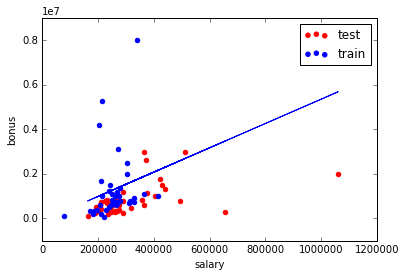

In [15]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
%pylab inline

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

Imagine you were a less savvy machine learner, and didn't know to test on a holdout test set. Instead, you tested on the same data that you used to train, by comparing the regression predictions to the target values (i.e. bonuses) in the training data. What score do you find? You may not have an intuition yet for what a 'good' score is; this score isn't very good (but it could be a lot worse).

In [35]:
target_train_np = np.array(target_train)
m_train = target_train_np.mean()
tss_train = sum((target_train_np - m_train)**2)
rss_train = sum((pred_train-np.array(target_train))**2)
1-rss_train/tss_train

0.045509192699524359

In [36]:
print(reg.score(feature_train, target_train))

0.0455091926995


Now compute the score for your regression on the test data, like you know you should. What's that score on the testing data? If you made the mistake of only assessing on the training data, would you overestimate or underestimate the performance of your regression?

In [7]:
print(reg.score(feature_test, target_test))

-1.48499241737


There are lots of finance features available, some of which might be more powerful than others in terms of predicting a persons bonus. For example, suppose you thought about the data a bit and guess that the long_term_incentive feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a persons bonus than their salary is.

A way to confirm that youre right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. Perform the regression of bonus against long term incentive--whats the score on the test data?

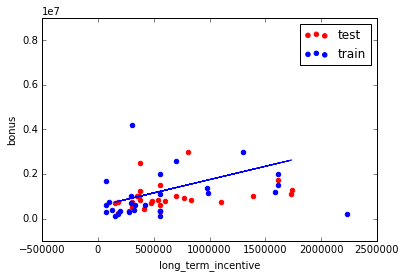

0.217085971258
-0.59271289995


In [41]:
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, 
                                                                          test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print(reg.score(feature_train, target_train))
print(reg.score(feature_test, target_test))

If you had to predict someones bonus and you could only have one piece of information about them, would you rather know their salary or the long term incentive that they received?

This is a sneak peek of the next lesson, on outlier identification and removal. Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like. You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and well spend lots of time on them in the next lesson.

A point like this can have a big effect on a regression: if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). Lets add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 

Now well be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. Whats the slope of the new regression line?

(Thats a big difference, and its mostly driven by the outliers. The next lesson will dig into outliers in more detail so you have tools to detect and deal with them.)

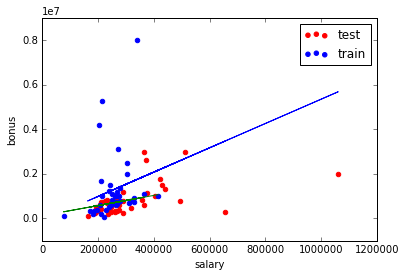

-0.123597985403
0.251488150398


In [45]:

features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, 
                                                                          test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
reg.fit(feature_test, target_test) 
plt.plot(feature_train, reg.predict(feature_train), color="g") 
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print(reg.score(feature_train, target_train))
print(reg.score(feature_test, target_test))